In [1]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
import os
def read_lines(file_path):
    if os.path.exists(file_path):
        array = []
        with open(file_path, 'r') as lines:
            for line in lines:
                array.append(line)
        return array
    else:
        #print 'file not exist: ' + file_path
        return None

from collections import defaultdict
ecs_lines = read_lines('./sample/3train.txt')
data_label = defaultdict(list)
for everydat in ecs_lines:
    everydat = everydat.split('\t')
    daytime = str(everydat[-1].split(' ')[0])
    cloudserve =  everydat[1]
    data_label[daytime].append(cloudserve) 
data_label = sorted(data_label.items(),reverse=True)
#========
input_lines = read_lines('./sample/3input.txt')
input_flavor = {}
for flavor in input_lines[3:-5]:
        if flavor:
           flavor = flavor.split(' ')
           input_flavor[flavor[0]] = [eval(i) for i in flavor[1:]]
#========
period_mean = defaultdict(list)
for _ in range(0,len(data_label)-7,7):
        #data_period = data_label[_*timeperiod:_*timeperiod+timeperiod]
        data_period = data_label[_:_+7]
        data_period = [ i[1] for i in data_period]
        p = []
        for _ in data_period:
            p += _
        for flavorstr in input_flavor.items():
            if p.count(flavorstr[0]):
                mean = p.count(flavorstr[0])
                period_mean[flavorstr[0]].append(mean)
period_mean

defaultdict(list,
            {'flavor1': [2, 3, 2],
             'flavor11': [5, 7, 5, 5, 6],
             'flavor12': [3, 1],
             'flavor14': [2, 13, 1, 21],
             'flavor2': [17, 1, 1],
             'flavor4': [2, 2, 3],
             'flavor5': [3, 8, 11, 6, 3],
             'flavor6': [2, 2, 2, 3],
             'flavor8': [32, 4, 15, 43, 15]})

In [3]:
def prepare_data(period_mean, lags=1):
    """
    Create lagged data from an input time series
    """
    X, y = [], []
    test_x = []
    for h in period_mean.items():
        print(h)
        a = h[1]
        X.extend(a[1:])
        y.extend(a[:-1])
        test_x.append(a[0])
    return np.array(X), np.array(y),np.array(test_x)
 
# prepare the data
lags = 1
X_train, y_train,test_x = prepare_data(period_mean, lags)
print(X_train,y_train)
print(test_x)


('flavor5', [3, 8, 11, 6, 3])
('flavor11', [5, 7, 5, 5, 6])
('flavor1', [2, 3, 2])
('flavor12', [3, 1])
('flavor2', [17, 1, 1])
('flavor8', [32, 4, 15, 43, 15])
('flavor14', [2, 13, 1, 21])
('flavor4', [2, 2, 3])
('flavor6', [2, 2, 2, 3])
[ 8 11  6  3  7  5  5  6  3  2  1  1  1  4 15 43 15 13  1 21  2  3  2  2  3] [ 3  8 11  6  5  7  5  5  2  3  3 17  1 32  4 15 43  2 13  1  2  2  2  2  2]
[ 3  5  2  3 17 32  2  2  2]


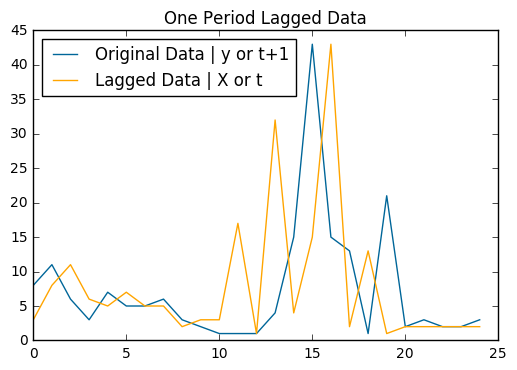

In [4]:
# plot the created data
plt.plot(X_train, label='Original Data | y or t+1', color='#006699')
plt.plot(y_train, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
plt.show()

In [5]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=300, batch_size=6, verbose=2)


Epoch 1/300
 - 0s - loss: 116.0967
Epoch 2/300
 - 0s - loss: 115.8997
Epoch 3/300
 - 0s - loss: 115.8358
Epoch 4/300
 - 0s - loss: 115.7899
Epoch 5/300
 - 0s - loss: 115.6155
Epoch 6/300
 - 0s - loss: 115.5452
Epoch 7/300
 - 0s - loss: 115.4601
Epoch 8/300
 - 0s - loss: 115.3889
Epoch 9/300
 - 0s - loss: 115.3005
Epoch 10/300
 - 0s - loss: 115.2229
Epoch 11/300
 - 0s - loss: 115.1555
Epoch 12/300
 - 0s - loss: 115.0504
Epoch 13/300
 - 0s - loss: 114.8887
Epoch 14/300
 - 0s - loss: 114.7935
Epoch 15/300
 - 0s - loss: 114.8117
Epoch 16/300
 - 0s - loss: 114.6585
Epoch 17/300
 - 0s - loss: 114.5878
Epoch 18/300
 - 0s - loss: 114.4956
Epoch 19/300
 - 0s - loss: 114.4527
Epoch 20/300
 - 0s - loss: 114.3975
Epoch 21/300
 - 0s - loss: 114.3427
Epoch 22/300
 - 0s - loss: 114.2919
Epoch 23/300
 - 0s - loss: 114.2492
Epoch 24/300
 - 0s - loss: 114.2373
Epoch 25/300
 - 0s - loss: 114.1648
Epoch 26/300
 - 0s - loss: 114.1765
Epoch 27/300
 - 0s - loss: 114.0431
Epoch 28/300
 - 0s - loss: 113.9624
E

In [6]:
mdl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


![]('/home/mxq/Desktop/深度截图_选择区域_20180413230056.png')
### 隐藏层
$$a11 = f(x*w11 + b11)$$

$$a12 = f(x*w12 + b12)$$

$$a12 = f(x*w13 + b13)$$

### 输出层

$$out = f(a11 * w21 + a12 * w22 + a13 * w23 + b21)$$

### 参数 
$${w11,b11,w12,b12,w13,b13,w21,w22,w23,b21}$$

In [7]:
# generate predictions for training
train_predict = mdl.predict(test_x)
print(train_predict)


[[  3.18695521]
 [  4.19951391]
 [  2.68067598]
 [  3.18695521]
 [ 10.27486515]
 [ 17.86905289]
 [  2.68067598]
 [  2.68067598]
 [  2.68067598]]
